## `Recurrent Neural Networks`
<center><img src="https://miro.medium.com/v2/resize:fit:1194/1*B0q2ZLsUUw31eEImeVf3PQ.png"></center>

* `Import Libraries`

In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [16]:
# Load IMDB Dataset; Load the data using only 10000 most frequent words and neglect other
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

In [17]:
# Unique values in y_train & y_test
np.unique(y_train), np.unique(y_test)

(array([0, 1]), array([0, 1]))

In [18]:
X_train[0]   # tokens already embedded

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [19]:
# Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:
max([max(idx) for idx in X_train])

9999

In [20]:
tf.keras.datasets.imdb.get_word_index() #we get only 10000

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [21]:
# Get the index of each word
word2idx = tf.keras.datasets.imdb.get_word_index()

# If you want to get text itslef from idx
idx2word = {word2idx.get(word): word for word in word2idx.keys()}
idx2word

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [22]:
# We want to decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".############3
' '.join([idx2word.get(i - 3, '?') for i in X_train[0]])  # for 1st instance

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [23]:
def reconstruct(tokens):
  """ A function to reconstruct the original text """
  return ' '.join([idx2word.get(i - 3, '?') for i in tokens])

# call the above function on another sample
reconstruct(X_train[100])

"? i am a great fan of david lynch and have everything that he's made on dvd except for hotel room the 2 hour twin peaks movie so when i found out about this i immediately grabbed it and and what is this it's a bunch of ? drawn black and white cartoons that are loud and foul mouthed and unfunny maybe i don't know what's good but maybe this is just a bunch of crap that was ? on the public under the name of david lynch to make a few bucks too let me make it clear that i didn't care about the foul language part but had to keep ? the sound because my neighbors might have all in all this is a highly disappointing release and may well have just been left in the ? box set as a curiosity i highly recommend you don't spend your money on this 2 out of 10"

In [24]:
len(X_train[0]), len(X_train[1])  # There are different lengths of tokens

(218, 189)

In [25]:
# Get the max sequence
max_seq_len = max([len(seq) for seq in X_train])
max_seq_len

2494

In [26]:
# some configurations
MAX_SEQUENCE_LENGTH = 100 # num tokens
BATCH_SIZE = 128
EPOCHS = 2
VOCAB_SIZE = len(word2idx)
EMBED_SIZE = 64 # each token will be emb to 64 num

In [27]:
X_train.shape

(25000,)

* `Padding & Truncation`

In [28]:
#train = (25000, 100, 64 ) --> (25000, )#(doc, max tokens, emb)
#test = (25000, 100, 64 ) --> (25000, )#(doc, max tokens, emb)

In [29]:
# Let's padd all sentences to have the same sequence length "MAX_SEQUENCE_LENGTH"
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post', value=0.0)
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post', value=0.0)
X_train_padded

array([[   1,   14,   22, ..., 2223, 5244,   16],
       [   1,  194, 1153, ...,  775,    7, 8255],
       [   1,   14,   47, ...,  326,   23, 2300],
       ...,
       [   1,   11,    6, ..., 4780,   11,    4],
       [   1, 1446, 7079, ...,    4,  719, 3798],
       [   1,   17,    6, ...,    5, 2642,  272]], dtype=int32)

In [30]:
print("X_train_padded shape:", X_train_padded.shape)
print("y_train dtype:", y_train.shape)
print()
print("X_test_padded shape:", X_test_padded.shape)
print("y_test dtype:", y_test.shape)

X_train_padded shape: (25000, 100)
y_train dtype: (25000,)

X_test_padded shape: (25000, 100)
y_test dtype: (25000,)


* `Model`

In [31]:
model = tf.keras.models.Sequential([

    # RNN base (feature extraction)
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_SIZE, input_length=MAX_SEQUENCE_LENGTH),
    tf.keras.layers.SimpleRNN(units=64, return_sequences=True), # mussttt return_sequences=True all older hidden state y1, y2 ...
    tf.keras.layers.SimpleRNN(units=64, return_sequences=True),
    tf.keras.layers.SimpleRNN(units=64), # due to task

    # FC
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # bin class
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Compile & fit
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

# earlys stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_padded, y_train,
                    validation_data=(X_test_padded, y_test),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=[early_stopping])

Epoch 1/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 53s 239ms/step - accuracy: 0.4989 - loss: 0.7123 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 2/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 216ms/step - accuracy: 0.5015 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6931


In [33]:
# evaluate on test
test_loss, test_acc = model.evaluate(X_test_padded, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5073 - loss: 0.6931
Test Loss: 0.6931487321853638
Test Accuracy: 0.5


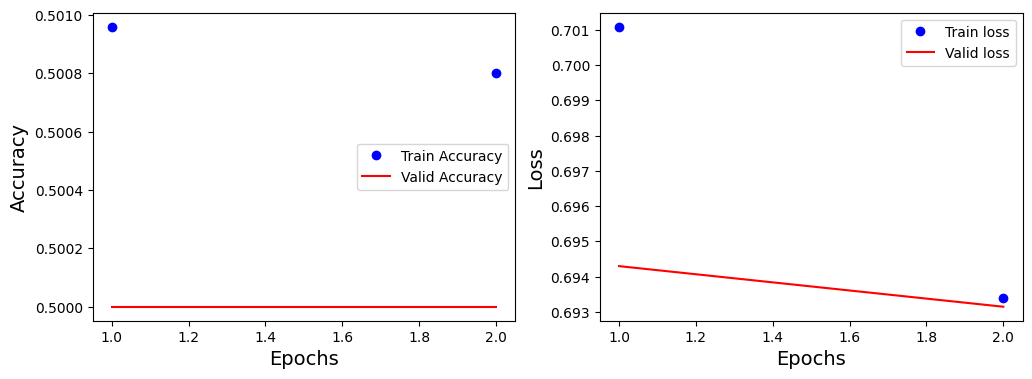

In [34]:
## Visualize the resutls
fia, ax = plt.subplots(1, 2, figsize=(12, 4))
n_epochs = len(history.history['loss'])  # real number of epochs in history, as we made early stopp
plt.sca(ax[0])
plt.plot(range(1, n_epochs+1), history.history['accuracy'], 'bo', label='Train Accuracy')
plt.plot(range(1, n_epochs+1), history.history['val_accuracy'], 'r-', label='Valid Accuracy')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy',  fontsize=14)
plt.legend()

plt.sca(ax[1])
plt.plot(range(1, n_epochs+1), history.history['loss'], 'bo', label='Train loss')
plt.plot(range(1, n_epochs+1), history.history['val_loss'], 'r-', label='Valid loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss',  fontsize=14)
plt.legend()
plt.show()

----

* `Bidirectional RNN`

In [35]:
model = tf.keras.models.Sequential([

    # RNN base
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_SIZE, input_length=MAX_SEQUENCE_LENGTH),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units=64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units=64)), # may be simplernn

    # FC
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Compile & fit
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

# earlys stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train_padded, y_train,
                    validation_data=(X_test_padded, y_test),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=[early_stopping])

Epoch 1/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 65s 297ms/step - accuracy: 0.5030 - loss: 0.7266 - val_accuracy: 0.5170 - val_loss: 0.6970
Epoch 2/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 66s 340ms/step - accuracy: 0.5352 - loss: 0.6912 - val_accuracy: 0.4831 - val_loss: 0.6964


In [37]:
# evaluate on test
test_loss, test_acc = model.evaluate(X_test_padded, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.4817 - loss: 0.6964
Test Loss: 0.696424126625061
Test Accuracy: 0.4830799996852875


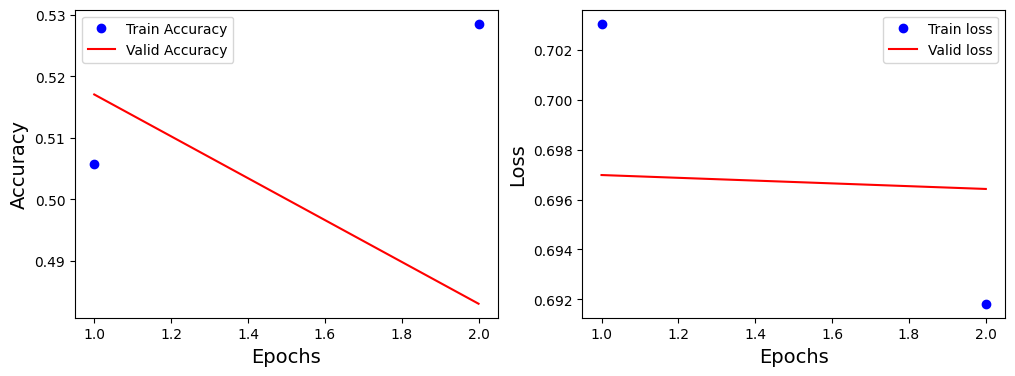

In [38]:
## Visualize the resutls
fia, ax = plt.subplots(1, 2, figsize=(12, 4))
n_epochs = len(history.history['loss'])  # real number of epochs in history, as we made early stopp
plt.sca(ax[0])
plt.plot(range(1, n_epochs+1), history.history['accuracy'], 'bo', label='Train Accuracy')
plt.plot(range(1, n_epochs+1), history.history['val_accuracy'], 'r-', label='Valid Accuracy')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy',  fontsize=14)
plt.legend()

plt.sca(ax[1])
plt.plot(range(1, n_epochs+1), history.history['loss'], 'bo', label='Train loss')
plt.plot(range(1, n_epochs+1), history.history['val_loss'], 'r-', label='Valid loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss',  fontsize=14)
plt.legend()
plt.show()

----

* `GRU`

In [39]:
model = tf.keras.models.Sequential([

    # RNN base
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_SIZE, input_length=MAX_SEQUENCE_LENGTH),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units=64, return_sequences=True)),
    tf.keras.layers.GRU(units=64, return_sequences=True),
    tf.keras.layers.GRU(units=32),

    # FC
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Compile & fit
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

# earlys stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train_padded, y_train,
                    validation_data=(X_test_padded, y_test),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=[early_stopping])

Epoch 1/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 139s 672ms/step - accuracy: 0.5017 - loss: 0.7014 - val_accuracy: 0.5034 - val_loss: 0.6933
Epoch 2/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 109s 558ms/step - accuracy: 0.5266 - loss: 0.6907 - val_accuracy: 0.5188 - val_loss: 0.6921


In [41]:
# evaluate on test
test_loss, test_acc = model.evaluate(X_test_padded, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.5171 - loss: 0.6919
Test Loss: 0.6920687556266785
Test Accuracy: 0.5187600255012512


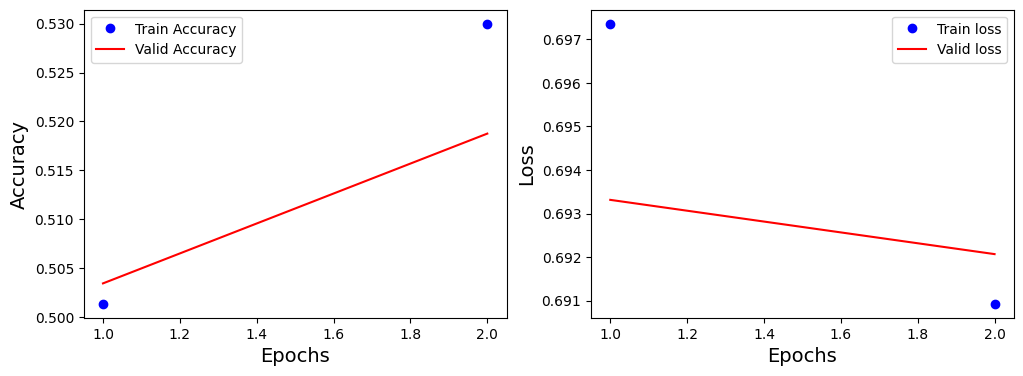

In [42]:
## Visualize the resutls
fia, ax = plt.subplots(1, 2, figsize=(12, 4))
n_epochs = len(history.history['loss'])  # real number of epochs in history, as we made early stopp
plt.sca(ax[0])
plt.plot(range(1, n_epochs+1), history.history['accuracy'], 'bo', label='Train Accuracy')
plt.plot(range(1, n_epochs+1), history.history['val_accuracy'], 'r-', label='Valid Accuracy')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy',  fontsize=14)
plt.legend()

plt.sca(ax[1])
plt.plot(range(1, n_epochs+1), history.history['loss'], 'bo', label='Train loss')
plt.plot(range(1, n_epochs+1), history.history['val_loss'], 'r-', label='Valid loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss',  fontsize=14)
plt.legend()
plt.show()

---

* `LSTM`

In [43]:
model = tf.keras.models.Sequential([

    # RNN base
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_SIZE, input_length=MAX_SEQUENCE_LENGTH),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, return_sequences=True)),
    tf.keras.layers.LSTM(units=64, return_sequences=True),
    tf.keras.layers.GRU(units=32),

    # FC
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Compile & fit
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

# earlys stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train_padded, y_train,
                    validation_data=(X_test_padded, y_test),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=[early_stopping])

Epoch 1/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 173s 840ms/step - accuracy: 0.5542 - loss: 0.6802 - val_accuracy: 0.6857 - val_loss: 0.6067
Epoch 2/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 201s 837ms/step - accuracy: 0.7912 - loss: 0.4639 - val_accuracy: 0.8058 - val_loss: 0.4290


In [45]:
# evaluate on test
test_loss, test_acc = model.evaluate(X_test_padded, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.8060 - loss: 0.4307
Test Loss: 0.42901530861854553
Test Accuracy: 0.8057600259780884


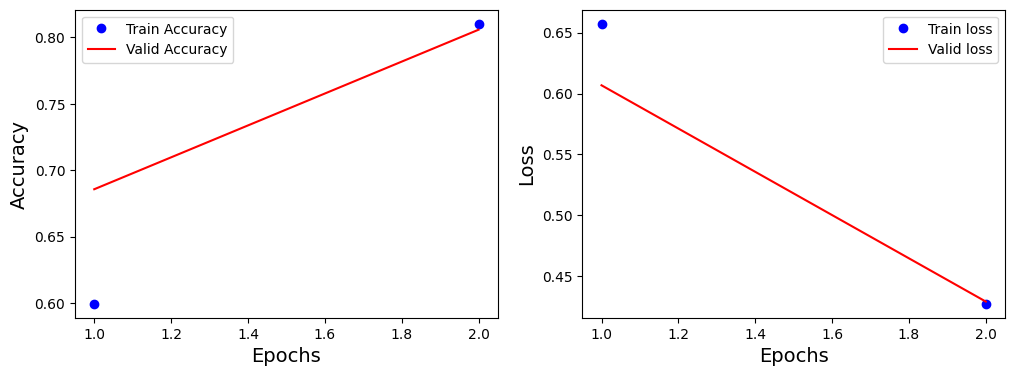

In [46]:
## Visualize the resutls
fia, ax = plt.subplots(1, 2, figsize=(12, 4))
n_epochs = len(history.history['loss'])  # real number of epochs in history, as we made early stopp
plt.sca(ax[0])
plt.plot(range(1, n_epochs+1), history.history['accuracy'], 'bo', label='Train Accuracy')
plt.plot(range(1, n_epochs+1), history.history['val_accuracy'], 'r-', label='Valid Accuracy')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy',  fontsize=14)
plt.legend()

plt.sca(ax[1])
plt.plot(range(1, n_epochs+1), history.history['loss'], 'bo', label='Train loss')
plt.plot(range(1, n_epochs+1), history.history['val_loss'], 'r-', label='Valid loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss',  fontsize=14)
plt.legend()
plt.show()

----

* `Inference on new sample using the last model (for exmaple)`

In [48]:
text = "the movie was super awesome!\
although i didn't like the fact that this piece of shit called star lord destroyed the \
whole mission, i wish they don't include him in the upcoming movies really."

# Encode the text to tokens
encoded_text = [word2idx.get(word, 0) for word in text.split()]

# Pad the encoded text
padded_text = tf.keras.preprocessing.sequence.pad_sequences([encoded_text], maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post', value=0.0)
# list of list

# Model Prediction
pos_prediction = model.predict(padded_text)
pos_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step


array([[0.6332875]], dtype=float32)

In [49]:
# If you want to reconstruct text, '?' is for 0 (not in vocab)
reconstructed_text = ' '.join([idx2word.get(idx, '?') for idx in encoded_text])
reconstructed_text

"the movie was super ? i didn't like the fact that this piece of shit called star lord destroyed the whole ? i wish they don't include him in the upcoming movies ?"

In [50]:
def inference(text: str, clf):
  """ A function for inference new samples of text
  """
  # Encode the text
  encoded_text = [word2idx.get(word, 0) for word in text.split()]

  # Pad the encoded text
  padded_text = tf.keras.preprocessing.sequence.pad_sequences([encoded_text], maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post', value=0.0)

  # Model Prediction
  prediction = [1 if clf.predict(padded_text)[0][0] >= 0.5 else 0]

  return prediction[0]

* `Let's save the last model to use it later`

In [51]:
# save using HDF5 Format
model.save('lstm_model.h5')

In [52]:
# Load the model and use it
loaded_model_h5 = tf.keras.models.load_model('/content/lstm_model.h5')
inference(text=text, clf=loaded_model_h5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step


1

-----

### Conclusion

* `In this notebook we have seen a brief on the recurrent neural networks, how they work and how to deal with sequences using them.`

* `We have seen that RNN are much more efficient in working with sequences because they learn the knowledge embedded in the sequence unlike feed forward network.`

* `We also discussed how GRU is better than RNN in two main points, the way it handles the memory and also the vanishing gradient handling.`

* `Finally we have seen the LSTM and how it adds more gates to learn more about the sequence and enable a long term memory besides the short term, thus can work with larger sequences.`


---